In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

In [2]:
df = pd.read_csv('/Users/allen/Downloads/Call_Data.csv')

## Data cleaning

In [3]:
# column Arrived Time ends with :000 which needs to be removed
df['Arrived Time'] = df['Arrived Time'].str.replace(':000', '')

In [4]:
%%time
# change datatype to datetime
df['Arrived Time'] = pd.to_datetime(df['Arrived Time'])

CPU times: user 7min 20s, sys: 1.83 s, total: 7min 22s
Wall time: 7min 25s


In [5]:
%%time
# change datatype to datetime
df['Original Time Queued'] = pd.to_datetime(df['Original Time Queued'])

CPU times: user 6min 53s, sys: 2.7 s, total: 6min 55s
Wall time: 7min 1s


In [8]:
# Calculate respnse time (minute)
df['response_time'] = (df['Arrived Time'] - df['Original Time Queued']) / np.timedelta64(1,'m')
df['response_time'] = df['response_time'].apply(lambda x: round(x, ndigits=2))

In [42]:
df.head()

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,response_time,YearMonth
0,2009000189335,Evidence Submitted (new incident number required),"TELEPHONE OTHER, NOT 911",1,DIST - IP/JO - DV DIST - NO ASLT,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",2009-06-02 03:35:46,2009-06-02 04:09:38,EAST,CHARLIE,C1,33.87,2009-06-01
3,2009000189341,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,2009-06-02 03:48:39,2009-06-02 04:01:55,SOUTH,OCEAN,O3,13.27,2009-06-01
4,2009000189342,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,2009-06-02 03:49:37,2009-06-02 04:22:28,WEST,DAVID,D1,32.85,2009-06-01
5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,2009-06-02 03:53:00,2009-06-02 04:21:52,NORTH,NORA,N3,28.87,2009-06-01
7,2009000189347,Evidence Submitted (new incident number required),"TELEPHONE OTHER, NOT 911",1,ARSON - REPORT,ARSON - REPORT,2009-06-02 03:55:27,2009-06-02 04:32:00,NORTH,NORA,N3,36.55,2009-06-01


In [22]:
# filter unuseful response time
df = df[(df['response_time'] > 1) & (df['response_time'] < 60)]

In [26]:
# create year month to aggregate
df['YearMonth'] = pd.to_datetime(df['Original Time Queued'].map(lambda x: str(x.year) + '-' + str(x.month)))

In [43]:
rt_by_year_month = df.groupby('YearMonth').agg(time = ('response_time', 'mean')).reset_index()

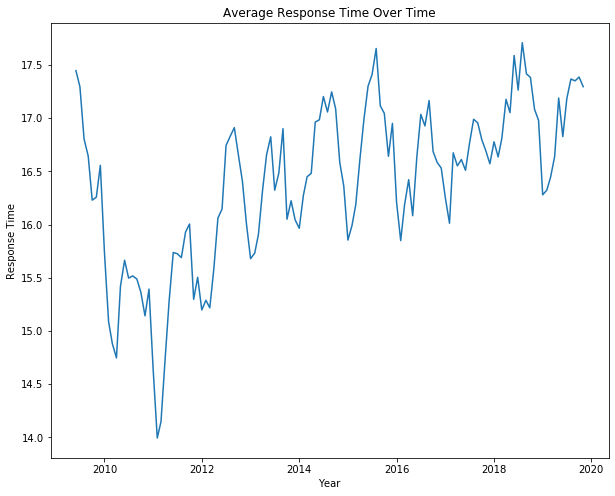

In [44]:
plt.figure(figsize=(10,8))
plt.plot(rt_by_year_month['YearMonth'], rt_by_year_month['time'])
plt.xlabel('Year')
plt.ylabel('Response Time')
plt.title('Average Response Time Over Time');

In [45]:
df.to_csv('/Users/allen/Documents/Data_512/Data/Call_Data_filtered.csv', index=False)

## Call types sorted by average response time

In [79]:
df.groupby('Call Type').agg(
    n = ('response_time', 'count'),
    avg_response_time = ('response_time', 'mean')
).sort_values('avg_response_time')

,n,avg_response_time
Call Type,,
FK ERROR,1,3.000000
POLICE (VARDA) ALARM,136,9.035515
TEXT MESSAGE,114,11.173596
HISTORY CALL (RETRO),49,12.292245
911,1072216,14.804807
ONVIEW,850,17.271871
ALARM CALL (NOT POLICE ALARM),78908,18.643788
"TELEPHONE OTHER, NOT 911",549678,19.234380
PROACTIVE (OFFICER INITIATED),43,20.109302


## Event description sorted by average response time

In [78]:
df.groupby('Event Clearance Description').agg(
    n = ('response_time', 'count'),
    avg_response_time = ('response_time', 'mean')
).sort_values('avg_response_time')

,n,avg_response_time
Event Clearance Description,,
Citations – Criminal Citation Issued (new incident number required),978,9.869438
PHYSICAL ARREST MADE,67346,10.288097
EXTRA UNIT,170,11.293882
RESPONDING UNIT(S) CANCELLED BY RADIO,7591,11.849443
STREET CHECK WRITTEN,7105,12.665904
DUPLICATED OR CANCELLED BY RADIO,8154,12.778341
"INCIDENT LOCATED, PUBLIC ORDER RESTORED",9083,12.803189
TRANSPORTATION OR ESCORT PROVIDED,1163,12.943336
-,1533,14.769230


## Priority sorted by average response time

In [77]:
df.groupby('Priority').agg(
    n = ('response_time', 'count'),
    avg_response_time = ('response_time', 'mean')
).sort_values('avg_response_time')

,n,avg_response_time
Priority,,
1,399988,8.314346
7,96,11.605625
2,622956,15.565028
9,413,17.998354
5,44640,19.793081
3,570537,22.032704
6,21550,22.479205
4,41866,23.135207


## Initial vs final call type

In [67]:
df['Call Type'].unique()

array(['TELEPHONE OTHER, NOT 911', '911', 'ALARM CALL (NOT POLICE ALARM)',
       'POLICE (VARDA) ALARM', 'IN PERSON COMPLAINT',
       'HISTORY CALL (RETRO)', 'ONVIEW', 'PROACTIVE (OFFICER INITIATED)',
       'SCHEDULED EVENT (RECURRING)', 'FK ERROR', 'TEXT MESSAGE'],
      dtype=object)

In [68]:
df['Final Call Type'].unique()

array(['--DV - ARGUMENTS, DISTURBANCE (NO ARREST)',
       '--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON',
       '--DISTURBANCE - OTHER', 'ARSON - REPORT',
       '--CRISIS COMPLAINT - GENERAL', 'RAPE', '--DISTURBANCE - NOISE',
       'DISTURBANCE, MISCELLANEOUS/OTHER',
       'ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE',
       '--CASUALTY,NON-TRAF,NON-CRIM - NON-DRUG RELATED',
       '--THEFT - SHOPLIFT', 'WARRANT - FELONY PICKUP',
       'LIQUOR VIOLATIONS - ADULT', '--MISCHIEF OR NUISANCE - GENERAL',
       '--ASSIST OTHER AGENCY - CITY AGENCY',
       'ASSIST OTHER AGENCY - ROUTINE SERVICE',
       'HAZ - IMMINENT THRT TO PHYS SAFETY (NO HAZ MAT)',
       '--AUTOMOBILES - RECOVERY (THEFT)',
       '--TRAFFIC - MV COLLISION INVESTIGATION',
       'DOA - CASUALTY, DEAD BODY',
       '--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)',
       'ALARM - COMM, SILENT/AUD BURG (INCL BANKS)',
       'HARAS - NO BIAS, THREATS OR MALICIOUSNESS',
       '--INTOX & LIQ VIOLS - ADULTS (VIOLATIONS)

## Precinct, Sector, and Beat

In [69]:
df.head(1)

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,response_time,YearMonth
0,2009000189335,Evidence Submitted (new incident number required),"TELEPHONE OTHER, NOT 911",1,DIST - IP/JO - DV DIST - NO ASLT,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",2009-06-02 03:35:46,2009-06-02 04:09:38,EAST,CHARLIE,C1,33.87,2009-06-01


In [71]:
df[df['Precinct'] != 'UNKNOWN'].groupby('Precinct').agg(
    n = ('response_time', 'count'),
    avg_response_time = ('response_time', 'mean')
).sort_values('avg_response_time')

,n,avg_response_time
Precinct,,
EAST,279778,15.093677
WEST,434508,15.789899
SOUTH,269711,16.054680
SOUTHWEST,195556,16.773057
NORTH,519529,17.664652


In [72]:
df.groupby('Sector').agg(
    n = ('response_time', 'count'),
    avg_response_time = ('response_time', 'mean')
).sort_values('avg_response_time')

,n,avg_response_time
Sector,,
EDWARD,118975,14.217488
KING,119394,14.697304
GEORGE,80525,14.891180
MARY,103125,15.132866
SAM,97799,15.625899
FRANK,95367,15.976119
OCEAN,62758,16.039227
DAVID,111506,16.073180
ROBERT,109154,16.447742


In [76]:
df.groupby('Beat').agg(
    n = ('response_time', 'count'),
    avg_response_time = ('response_time', 'mean')
).sort_values('avg_response_time')

,n,avg_response_time
Beat,,
DSPVD,1,1.250000
XDD,1,1.920000
ODD,1,5.420000
DS,1,5.850000
RS,1,6.100000
MS,1,7.450000
CMD4,2,7.575000
SPVD,2,8.990000
E2,39187,13.041984
